In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-image-dataset-90-different-animals


In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import cv2


In [21]:

# Ensuring the GPU is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('GPU is being used.')
else:
    print('GPU is not being used.')


GPU is being used.


In [28]:
dataset_path = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals" # Removed extra space at the beginning

# List all the classes (Animal Types)
classes = os.listdir(dataset_path)
num_classes = len(classes)

# Display the number of classes along with names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 90
Classes: ['beetle', 'parrot', 'fox', 'wolf', 'hedgehog', 'turtle', 'snake', 'shark', 'horse', 'antelope', 'hamster', 'woodpecker', 'eagle', 'chimpanzee', 'bison', 'penguin', 'butterfly', 'sandpiper', 'hornbill', 'lion', 'lobster', 'oyster', 'otter', 'grasshopper', 'raccoon', 'dog', 'pigeon', 'donkey', 'hippopotamus', 'hummingbird', 'bear', 'coyote', 'bee', 'pig', 'rat', 'owl', 'caterpillar', 'koala', 'squid', 'hare', 'whale', 'mouse', 'tiger', 'fly', 'lizard', 'orangutan', 'bat', 'porcupine', 'kangaroo', 'gorilla', 'starfish', 'mosquito', 'crow', 'possum', 'goldfish', 'swan', 'elephant', 'sheep', 'dragonfly', 'zebra', 'seal', 'octopus', 'cow', 'ox', 'wombat', 'reindeer', 'panda', 'duck', 'goose', 'goat', 'badger', 'flamingo', 'crab', 'seahorse', 'rhinoceros', 'dolphin', 'okapi', 'moth', 'sparrow', 'pelecaniformes', 'squirrel', 'leopard', 'jellyfish', 'ladybugs', 'cockroach', 'hyena', 'cat', 'deer', 'turkey', 'boar']


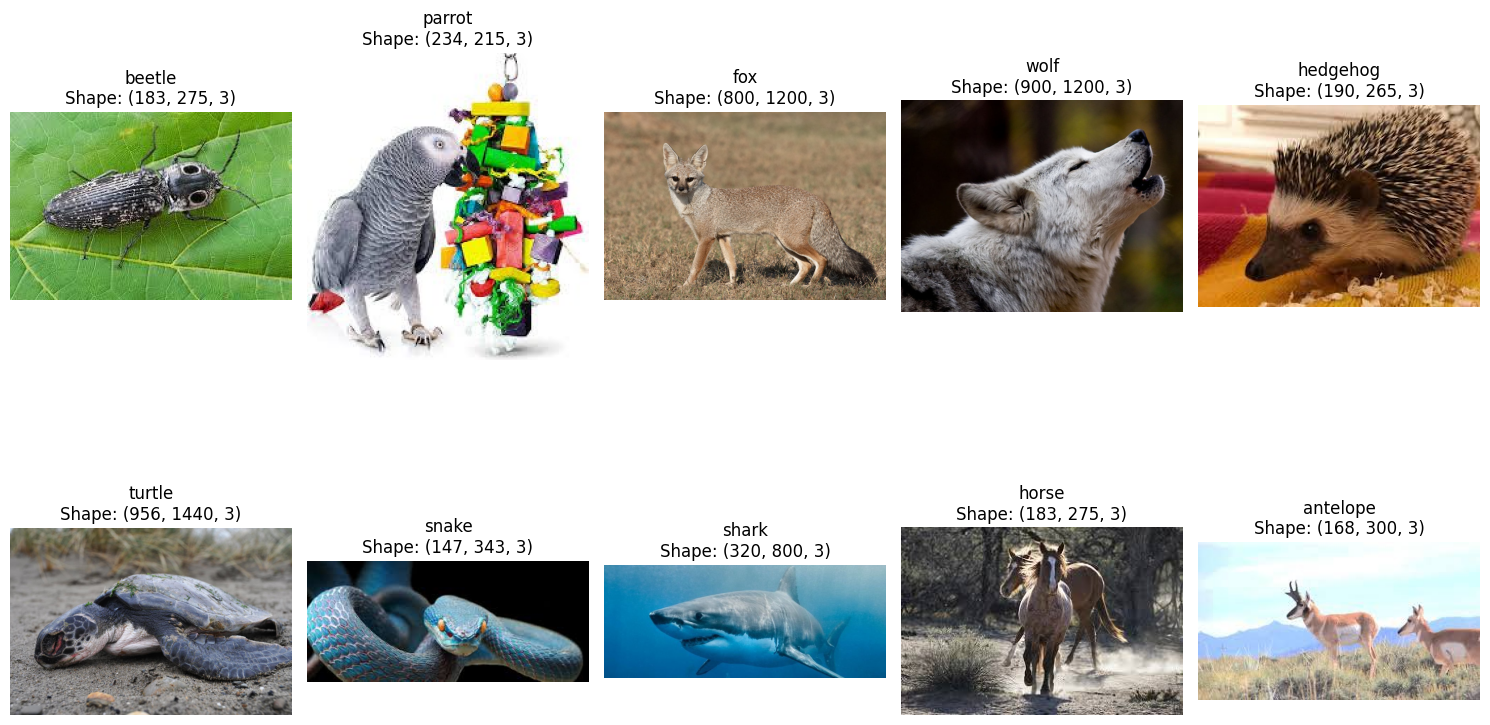

In [29]:
plt.figure(figsize=(15, 10))

for i, class_name in enumerate(classes[:10]):  # Display first 10 classes
    class_path = os.path.join(dataset_path, class_name)

    if not os.path.isdir(class_path):  # Ensure it's a directory
        print(f"Skipping {class_name} (not a directory)")
        continue

    # Find first valid image
    img = None
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        if os.path.isfile(img_path) and img_name.lower().endswith(('.jpg', '.png', '.jpeg')):
            img = plt.imread(img_path)
            break  # Stop after finding the first valid image

    # Plot only if an image was found
    if img is not None:
        plt.subplot(2, 5, i + 1)  # Arrange in a 2-row, 5-column grid
        plt.imshow(img)
        plt.title(f'{class_name}\nShape: {img.shape}')
        plt.axis('off')
    else:
        print(f"Warning: No valid images found in {class_name}")

plt.tight_layout()
plt.show()